# Assignment 1: PyTorch Introduction

In this assignment, you will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work. Then in the second part of the assignment you will train a neural network (using PyTorch) to classify an image into one of two classes: "car" or "truck". The code for the neural networks
you train will be written for you, and you are not (yet!) expected
to understand all provided code. However, by the end of the assignment,
you should be able to:

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.

*This assignment is based on an assignment developed by Prof. Lisa Zhang.*

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. Please take extra effort to make your answers and submissions readable. Do not display unnecessary outputs, only the ones that are important for supporting your answers.

You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your colab file here and ensure the file can be accessed by the our teaching team.

Colab Link:

In [ ]:
# TO BE COMPLETED
https://colab.research.google.com/drive/1K7klHP-W7N8sYCSTrJ71xG2plhUJzQs-#scrollTo=NciQVBmzdRb8


SyntaxError: ignored

#PART A: Constructing a Neural Network [8pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:

In [ ]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris_3class.csv to Iris_3class.csv


In [ ]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [ ]:
# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int64
(50, 4) (50, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [ ]:
#Convert array to one-hot encoding
#Labels data by creating a 2D array with one collumn for each possible classification
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [ ]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [ ]:
#verify one-hot encoding
y_train[0:5,:]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Part 1. Develop a 2-layer ANN [6pt MODEL]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with respect to the layer 1 and layer 2 weights.

In [ ]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
  e = np.exp(x)
  return e/e.sum(axis=1, keepdims = True)

def softmax_grad(x):
  # x = [100x3]
  M, N = x.shape
  s = softmax(x)

  # Create a 3D identity tensor for the softmax derivatives
  eye = np.eye(N).reshape(1, N, N)

  # Compute the gradient matrix using vectorized operations
  gradients = s[:, :, np.newaxis] * (eye - s[:, np.newaxis, :]) # [100 x 3 x a] x ( [ax3x3] - [100 x a x 3])

  return gradients # gradients = [100 x 3 x 3]

def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1)

  # softmax
  output = softmax(layer2)

  #Back propagation using gradient descent

  #cross-entropy loss
  error = -1*np.sum(y_train * np.log(output)) / len(y_train) # TO BE COMPLETED

  #initialize gradients to zero
  dw0 = np.zeros((4,5)) # TO BE COMPLETED
  dw1 = np.zeros((5,3)) # TO BE COMPLETED

  #calculate gradients
  dC_dL2 = (output - y_train)/output.shape[0] #gradient of cross entropy loss
  dL2_dL1_hat = w1.T
  dL1_hat_dL1 = layer1 * (1 - layer1) #gradient of the sigmoid

  dL1_dw0 = X_train #for computing partial derivative with respect to w0
  dL2_dw1 = layer1 #for computing partial derivative with respect to w1

  # TO BE COMPLETED

  #determine gradients
  # TO BE COMPLETED
  dw1 += dL2_dw1.T.dot(dC_dL2)
  dw0 += dL1_dw0.T.dot(dC_dL2.dot(dL2_dL1_hat)* dL1_hat_dL1)

  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))# TO BE COMPLETED

  return (error, dW, output)


## Part 2. Train your neural network [2pt RESULT]
How well does your network work on the iris dataset?

In [ ]:
num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  # print(i)
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)


In [ ]:
#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(y_pred, 0)
pred[:20]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
#examine ground truth training data
train = np.round(y_train, 0)
train[:20]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

When cross examining the training data predictions and the ground truth results,
out of the first 20 samples the neural network gets 19/20 correct (misses sample
#6). For another sample set the network achieves 20/20 correct.
Overall the network does well, and the gradients are correctly computed.
More analysis on the network is nesecary to determine if the training set has
overfit the network.

'''

## Part 3. Validation [2pt MODEL]
Validate that the gradients were computed correctly for the 2-layer neural network you developed.

In [ ]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten()))# TO BE COMPLETED

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))

  #increment slightly
  #sample set 1 (increasing)
  We1[ind] = We1[ind] + 0.0001# TO BE COMPLETED
  #sample set 2 (decreasing)
  We2[ind] = We2[ind] - 0.0001# TO BE COMPLETED

  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)

  #obtain numerical gradients
  grad_num = (error_e1 - error_e2)/0.0002# TO BE COMPLETED

  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.0 0.012683006543889874 0.012683006092243095
0.0 0.0005867386687619103 0.0005867385324451725
0.0 0.07524852949747363 0.0752485374227083
0.0 0.06367748360935899 0.06367748242998883
0.0 -0.006605957664218565 -0.0066059574228196525
0.0 0.00850148174302845 0.00850148160330136
0.0 0.0001210810007812313 0.00012108099358781077
0.0 0.05693165740283668 0.0569316581524674
0.0 0.04227106634946409 0.04227106602003988
0.0 -0.003927734311126585 -0.003927734252036314
0.0 0.0036118963531173165 0.0036118963438553594
0.0 0.001468671727566928 0.0014686715368460589
0.0 -0.0012555137540726236 -0.0012555099897134528
0.0 0.019710316709886655 0.019710316708438265
0.0 -0.0025555732707793766 -0.0025555733056073764
0.0 0.0006133990004819623 0.0006133990009154864
0.0 0.0008756942448950866 0.0008756942322995405
0.0 -0.009970005252490921 -0.009970005097527287
0.0 0.003562654590227865 0.0035626545967326487
0.0 -0.0004333244330023689 -0.00043332443774146673
0.0 -0.005675794847448401 -0.005675794846752446
0.0 0.00313

# PART B: Cars vs Trucks [30Pt]

In the second part of the assignment we will see how we can use PyTorch to train a neural network to identify Cars and Trucks.

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part 0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [ ]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cars and trucks, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch

    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)

    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%

    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]

    # ***I don't understand any of this really***
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)

    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels # *this is weird*
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part 1. Visualizing the Data

We will make use of some of the CIFAR-10 data set, which consists of
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

For this assignment, we will only be using the car and truck categories.
We have included code that automatically downloads the dataset the
first time that the main script is run.

In [ ]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"],
    batch_size=1) # One image per batch

Files already downloaded and verified
Files already downloaded and verified


### Part (i) [0.5pt EXPLORATORY]

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

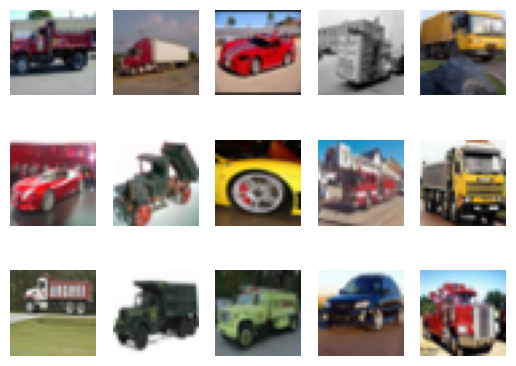

In [ ]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW
?





'''

### Part (ii) [1pt EXPLORATORY]

How many training examples do we have for the combined `car` and `truck` classes?
What about validation examples?
What about test examples?

In [ ]:
# TO BE COMPLETED

print("Number of Training Samples: {}".format(len(train_loader)))
print("Number of Validation Samples: {}".format(len(val_loader)))
print("Number of Testing Samples: {}".format(len(test_loader)))


Number of Training Samples: 8000
Number of Validation Samples: 2000
Number of Testing Samples: 2000


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

We have 8000 Training images, 2000 validation images, and 2000 testing images.




'''

## Part 2. Training

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [ ]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
small_net = SmallNet()
large_net = LargeNet()

### Part (i) [1pt EXPLORATORY]

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values.

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [ ]:
# for param in small_net.parameters():
#     print(param.shape)

In [ ]:
# TO BE COMPLETED

# for param in large_net.parameters():
#   print(param.shape)
num_params_large = sum(p.numel() for p in large_net.parameters())
num_params_small = sum(p.numel() for p in small_net.parameters())
print(num_params_small, num_params_large)


386 9705


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

There are 386 parameters in the small network and 9705 parameters in the large net.


'''

### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [ ]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part (ii) [0.5pt EXPLORATORY]

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on.

What are the default values of the parameters `batch_size`, `learning_rate`,
and `num_epochs`?

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Defaults:
batch_size = 64,
learning_rate = 0.01,
num_epoch = 30


'''

### Part (iii) [0.5pt EXPLORATORY]
What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Files Written:
At the end of each training epoch, a dictionary of the current network
parameters are saved which can be used to resume training or make a prediction.

Training error,
Training loss,
Validation error,
Validation loss

At the end of each epoch, the training and validation error/loss are logged
using the np.savetext function to keep track of the network's performance.


'''

### Part (iv) [0.5pt EXPLORATORY]
Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights)
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive
so that the files generated by `train_net` gets saved. We will be using
these files in the parts that follow.
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [ ]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the assignment locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# TO BE COMPLETED
# train_net(large_net, batch_size=64, learning_rate=0.01, num_epochs=30)

train_net(small_net, batch_size=64, learning_rate=0.01, num_epochs=30)



Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.367875, Train loss: 0.6336472191810608 |Validation err: 0.3245, Validation loss: 0.5902657359838486
Epoch 2: Train err: 0.2665, Train loss: 0.542817937374115 |Validation err: 0.249, Validation loss: 0.519213923253119
Epoch 3: Train err: 0.234125, Train loss: 0.49180200362205506 |Validation err: 0.2305, Validation loss: 0.48011608235538006
Epoch 4: Train err: 0.216375, Train loss: 0.46952745628356934 |Validation err: 0.2015, Validation loss: 0.4582738662138581
Epoch 5: Train err: 0.212375, Train loss: 0.4577269515991211 |Validation err: 0.207, Validation loss: 0.463588104583323
Epoch 6: Train err: 0.20825, Train loss: 0.45257703232765195 |Validation err: 0.226, Validation loss: 0.47234864719212055
Epoch 7: Train err: 0.198, Train loss: 0.4353027672767639 |Validation err: 0.1925, Validation loss: 0.4486638130620122
Epoch 8: Train err: 0.194, Train loss: 0.42265940928459167 |Validation err: 0

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Small network took 142.46 seconds

Large network took 185.79 seconds

The large network predictably took longer to train because on each iteration
it has significantly more operations to undergo for both forward and
backward propagation in the network, including calculating gradients,
which makes training slower.


'''

### Part (v) [0.5pt EXPLORATORY]
Use the function `plot_training_curve` to display the trajectory of the
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

In [ ]:
model_path1 = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)
model_path2 = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29)

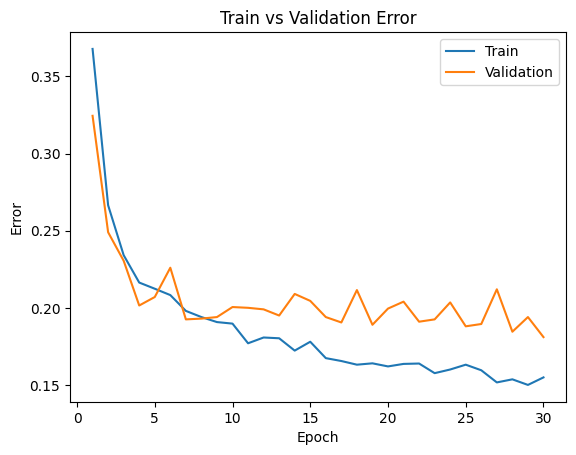

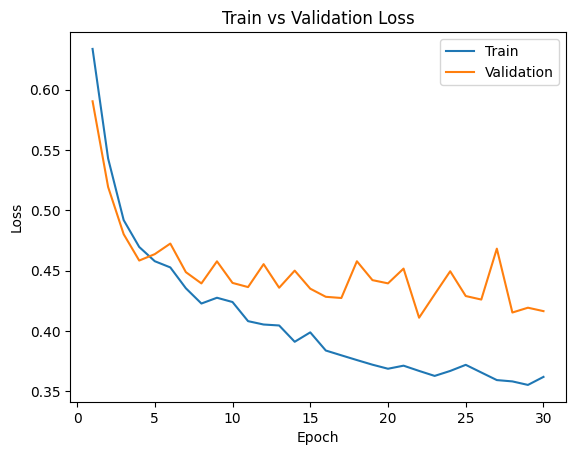

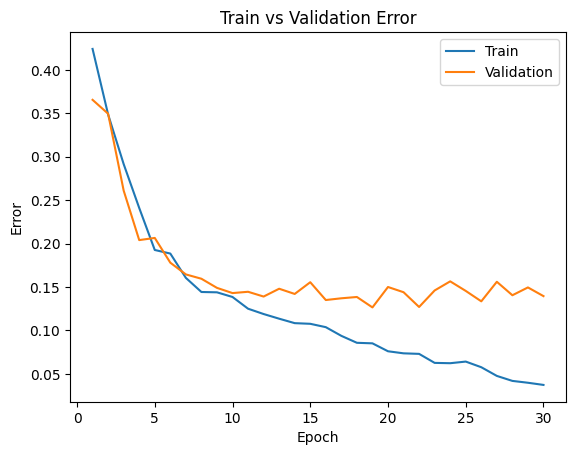

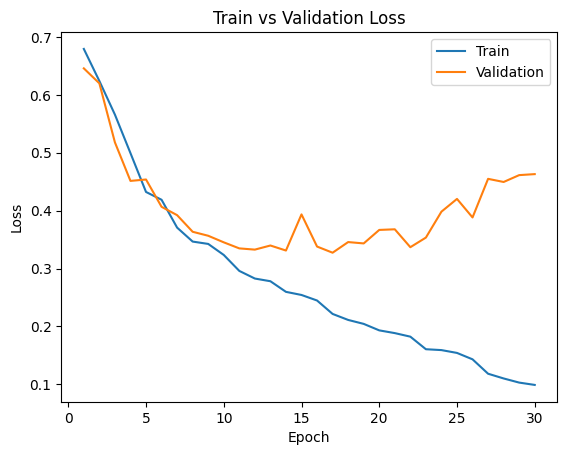

In [ ]:
# TO BE COMPLETED
plot_training_curve(model_path1)
plot_training_curve(model_path2)

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (vi) [0.5pt EXPLORATORY]
Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

the small net started out with high loss and error and decreased quickly at the
beginning of training before it plateaud around 20% error at the training curve
and closer to 18 or 19% error on the validation curve. This is an obvious case
of overfitting where the network is better suited to the training set than it
is validation.

The large network converged to a lower overall error in it's training set
around 5%, but similarily suffered from severe overfittingfitting with the validation
error remaining as high as 15%. Unlike the small network, the large network's
training curve doesnt appear to plateau as much. Additionaly, while the error
diminished, the loss of the validation set actually began to drastically
increase near the latter part of the training, again, clearly indicating
overfitting.

Some takeaways: Both networks are overfit but the large network seems to suffer
more. The large network, thanks likely due to it's higher complexity, converges
to a lower error on it's training and validation sets then the small network.


'''

## Part 3. Optimization Parameters

For this section, we will work with `large_net` only.

### Part (i) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

In [ ]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()

In [ ]:
# TO BE COMPLETED
train_net(large_net, batch_size=64, learning_rate=0.001, num_epochs=30)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4585, Train loss: 0.6922090911865234 |Validation err: 0.4145, Validation loss: 0.6918484680354595
Epoch 2: Train err: 0.404, Train loss: 0.6912762837409974 |Validation err: 0.401, Validation loss: 0.6909310147166252
Epoch 3: Train err: 0.39125, Train loss: 0.6897973504066467 |Validation err: 0.3825, Validation loss: 0.6891596242785454
Epoch 4: Train err: 0.391, Train loss: 0.6871493883132934 |Validation err: 0.379, Validation loss: 0.6860428061336279
Epoch 5: Train err: 0.37275, Train loss: 0.6819084930419922 |Validation err: 0.3725, Validation loss: 0.6794121749699116
Epoch 6: Train err: 0.367, Train loss: 0.6722611665725708 |Validation err: 0.3745, Validation loss: 0.6701584309339523
Epoch 7: Train err: 0.367375, Train loss: 0.6595345559120178 |Validation err: 0.3785, Validation loss: 0.6627401951700449
Epoch 8: Train err: 0.36425, Train loss: 0.6492524642944336 |Validation err: 0.3765, 

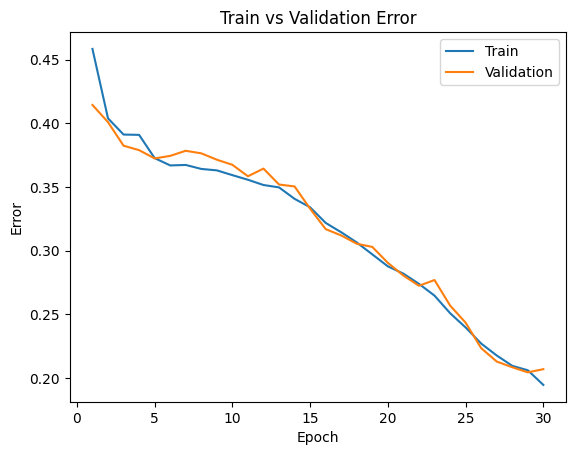

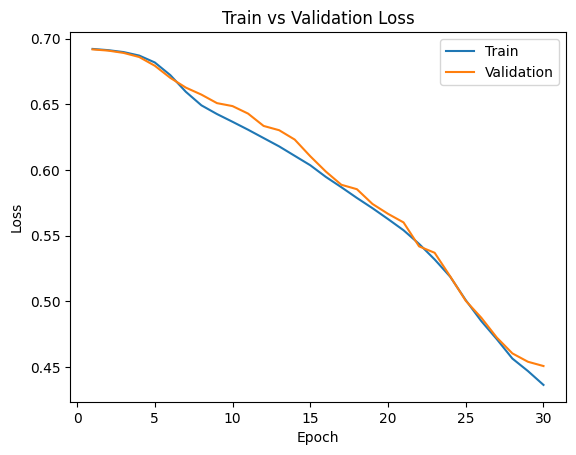

In [ ]:
model_path3 = get_model_name("large", batch_size=64, learning_rate=0.001, epoch=29)
plot_training_curve(model_path3)

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW
Decreasing the learning rate has the effect of taking smaller steps during
gradient descent, this is helpful in maining a more stable training, but may
not converge to an optimized network as quickly. In this case, we see that
it has greatly improved network stability and overfitting, but the final error
by the end of the training is actually higher at 20% for both training and
validation sets, meaning that this model is underfit! This tells me however that
a learning rate of 0.01 may be too high and cause instability in the network
resulting in suboptimal weights. Even though the error is higher, using this
learning rate does not lead to overfitting, making the network more
generalizable. With more training I'd expect a network with this learning rate
to outperform the one trained withvlr=0.01.

In terms of time the network took 161 seconds to train, which is rough similar
to before, yet slightly faster. I wouldn't expect the learning rate to
drastically change computational time.



'''

### Part (ii) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.1`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.3435, Train loss: 0.6152465670108795 |Validation err: 0.2655, Validation loss: 0.5401884317398071
Epoch 2: Train err: 0.26275, Train loss: 0.5457514839172364 |Validation err: 0.2255, Validation loss: 0.47185863088816404
Epoch 3: Train err: 0.205125, Train loss: 0.4577759726047516 |Validation err: 0.196, Validation loss: 0.42472241446375847
Epoch 4: Train err: 0.18375, Train loss: 0.42987853920459745 |Validation err: 0.193, Validation loss: 0.4498207103461027
Epoch 5: Train err: 0.182875, Train loss: 0.4176621789932251 |Validation err: 0.1765, Validation loss: 0.3949774377979338
Epoch 6: Train err: 0.1775, Train loss: 0.407295166015625 |Validation err: 0.218, Validation loss: 0.47349493484944105
Epoch 7: Train err: 0.15425, Train loss: 0.36420914459228515 |Validation err: 0.1665, Validation loss: 0.3992267334833741
Epoch 8: Train err: 0.143125, Train loss: 0.34258134818077085 |Validation er

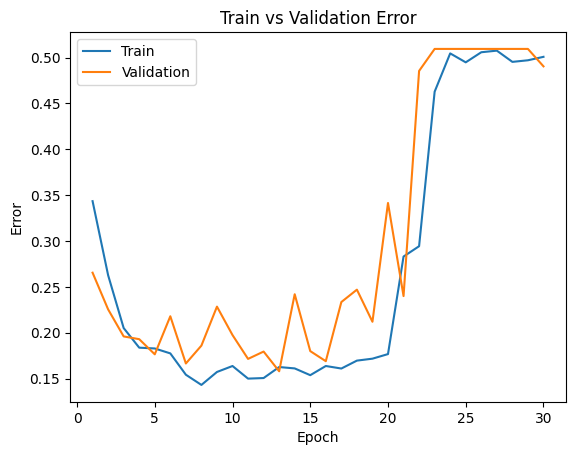

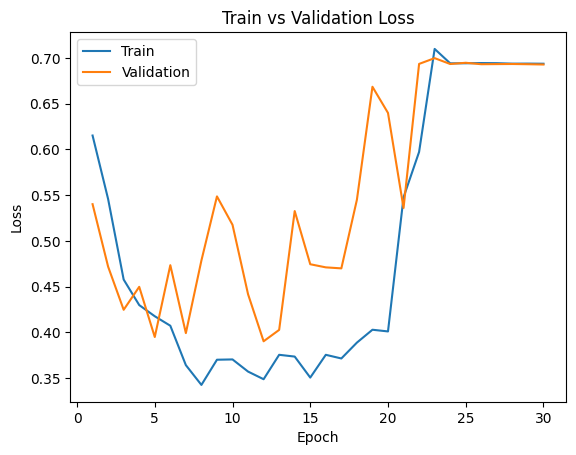

In [ ]:
# TO BE COMPLETED

large_net = LargeNet()
train_net(large_net, batch_size=64, learning_rate=0.1, num_epochs=30)
model_path4 = get_model_name("large", batch_size=64, learning_rate=0.1, epoch=29)
plot_training_curve(model_path4)

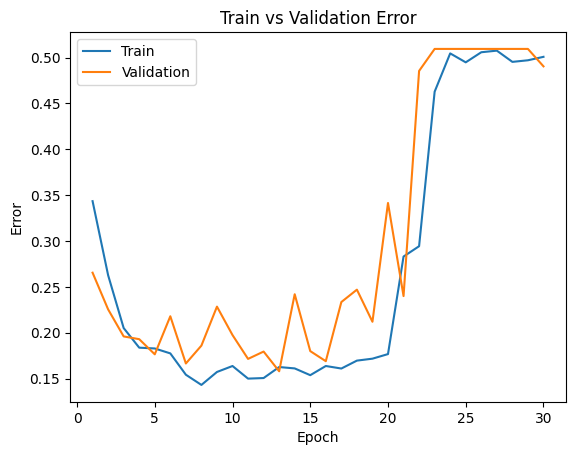

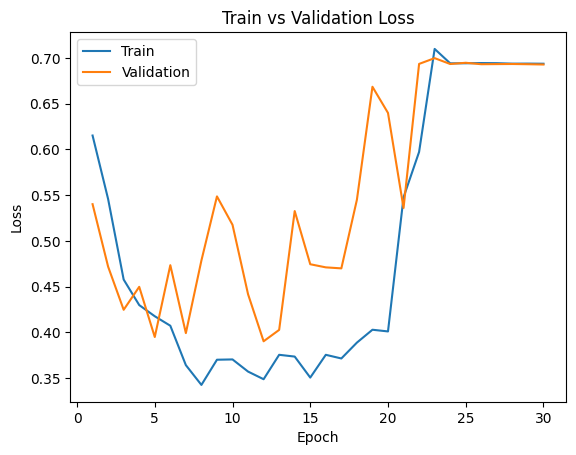

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW
The model took 156 seconds to run, again, not significantly different from the
other 2 learning rates, nor would I expect it to be.

Increasing the learning rate has drastically raised network instability. By
taking such large steps during gradient descent the network is completely
missing the local minimias. Instead, the network weights are randomly bouncing
around the high dimensional topology, which is why the network did not minimize
the error and diverges instead. This is a poorly conditioned network.



'''

### Part (iii) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.502375, Train loss: 0.6933987438678741 |Validation err: 0.4905, Validation loss: 0.6929870843887329
Epoch 2: Train err: 0.500375, Train loss: 0.6930701546370983 |Validation err: 0.49, Validation loss: 0.692890465259552
Epoch 3: Train err: 0.46275, Train loss: 0.6927703507244587 |Validation err: 0.464, Validation loss: 0.6926897764205933
Epoch 4: Train err: 0.447625, Train loss: 0.6924619600176811 |Validation err: 0.45, Validation loss: 0.6924453228712082
Epoch 5: Train err: 0.425375, Train loss: 0.6919226571917534 |Validation err: 0.438, Validation loss: 0.6917978227138519
Epoch 6: Train err: 0.405625, Train loss: 0.6911653876304626 |Validation err: 0.418, Validation loss: 0.6909997761249542
Epoch 7: Train err: 0.3915, Train loss: 0.6899251528084278 |Validation err: 0.4065, Validation loss: 0.6894433498382568
Epoch 8: Train err: 0.37975, Train loss: 0.6878201514482498 |Validation err: 0.39

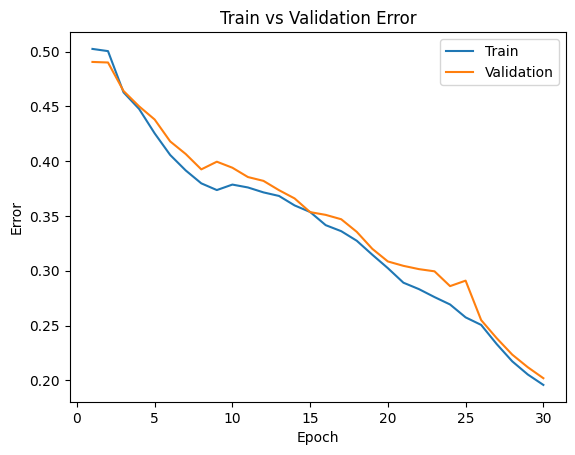

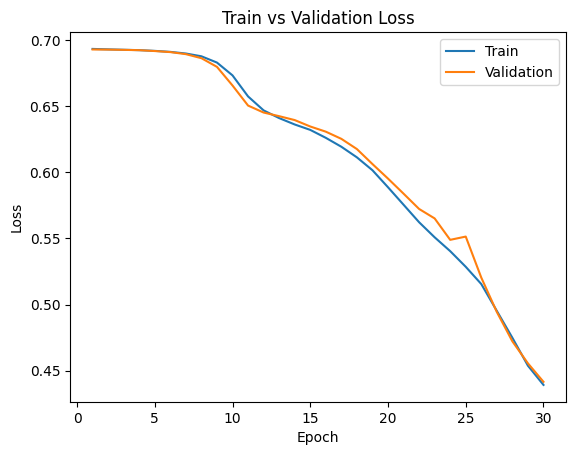

In [ ]:
# TO BE COMPLETED

large_net = LargeNet()
train_net(large_net, batch_size=512, learning_rate=0.01, num_epochs=30)
model_path5 = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29)
plot_training_curve(model_path5)


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Increasing batch size will improve averaging of the network weights, this
generally leads to more stable convergence of a network and less noisiness
in training steps, which is what we see here. At the same time, larger batch
sizes tend to take longer dueto higher memory requirements and more operations.
Aditionally, because of the averaging affect, larger batch sizes are also prone
to overfitting by getting stuck in the local minima of a training set.
This effect, however, isn't really observed in the data here. Instead, the
training and validation curves are relatively well fit, but undertrained,
having not gotten to a plateau yet, the network could do with further training.

Computational time has not significantly changed (once again), but is slightly
lower than before.


'''

### Part (iv) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.34375, Train loss: 0.6175165125727653 |Validation err: 0.2625, Validation loss: 0.540454069852829
Epoch 2: Train err: 0.22325, Train loss: 0.4730004854500294 |Validation err: 0.2035, Validation loss: 0.43918069565296175
Epoch 3: Train err: 0.25525, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 4: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 5: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 6: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 7: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 8: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 9: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 10: Train err: 0.502375, Train lo

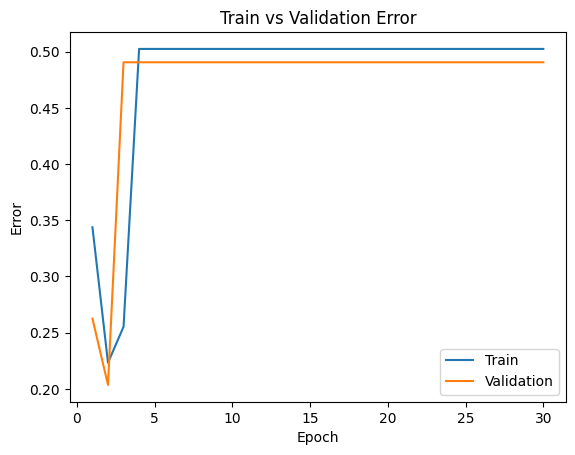

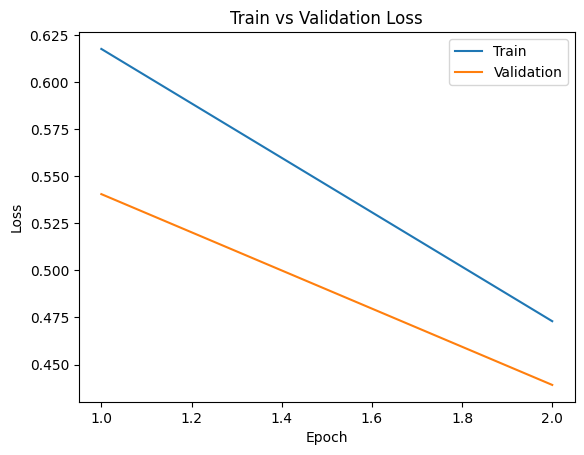

In [ ]:
# TO BE COMPLETED

large_net = LargeNet()
train_net(large_net, batch_size=16, learning_rate=0.01, num_epochs=30)
model_path6 = get_model_name("large", batch_size=16, learning_rate=0.01, epoch=29)
plot_training_curve(model_path6)




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

It would seem as though having a realtively high learning rate at 0.01 and a
small batch size at 16 is causing some sort of issues resulting in numerical
instability. My guess is that we have an exploding gradient problem. Since the
batch size is so small, gradients between iterations can varry drastically, and
averaging is reduced. Combined with the higher learning rate, I think that
extemely large weights cause skews in the gradient and are causing the
cross entropy loss to NaN thanks to the logarithmic term in the function.

Solving time has increased from the other trials.


'''

## Part 4. Hyperparameter Search

### Part (i) [1pt EXPLORATORY]

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

I enjoyed the increased stability found from either increasing batch size or
decreasing learning rate. I'd like to try a combination which allows the network
to train stably, but also get to a minimized value (without overfitting) within
30 epochs. I think the best options for this are to dervice some stability from
decreasing the learning rate, and slightly decrease the batch size so that the
network can explore the loss plain a bit more. I'm going to try a learning rate
of 0.001 and batch size of 32. These choices are obviously somewhat arbitrary,
but I'm hoping that a better balance is essentialy struck between reducing the
averaging through reduced batch size and minimizing exploding gradients/minima
overshoot through a lowered lr.

'''

### Part (ii) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(i), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.43575, Train loss: 0.6917999017238617 |Validation err: 0.4005, Validation loss: 0.6908418952472626
Epoch 2: Train err: 0.391125, Train loss: 0.6885279052257538 |Validation err: 0.3825, Validation loss: 0.6861630422728402
Epoch 3: Train err: 0.369625, Train loss: 0.6772016158103943 |Validation err: 0.3715, Validation loss: 0.6702478244191125
Epoch 4: Train err: 0.364375, Train loss: 0.6550927977561951 |Validation err: 0.377, Validation loss: 0.6561524016516549
Epoch 5: Train err: 0.3655, Train loss: 0.640807126045227 |Validation err: 0.3675, Validation loss: 0.6468247288749331
Epoch 6: Train err: 0.353375, Train loss: 0.6287272845506668 |Validation err: 0.366, Validation loss: 0.6345798534060282
Epoch 7: Train err: 0.347625, Train loss: 0.6155831761360169 |Validation err: 0.352, Validation loss: 0.6205919034897335
Epoch 8: Train err: 0.33025, Train loss: 0.6000627863407135 |Validation err: 

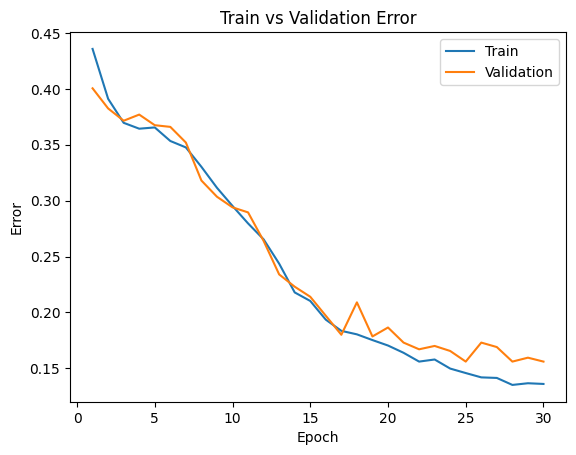

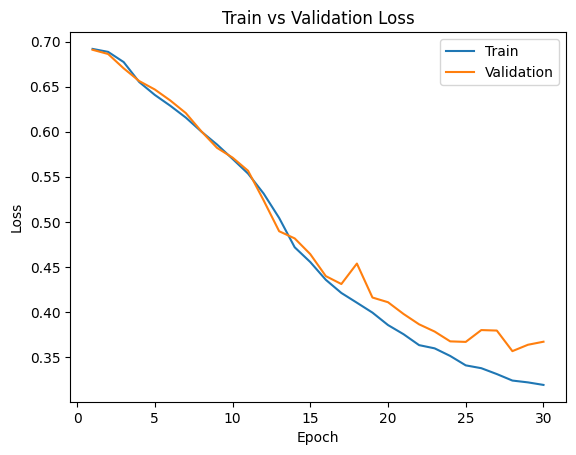

In [ ]:
# TO BE COMPLETED

large_net = LargeNet()
train_net(large_net, batch_size=32, learning_rate=0.001, num_epochs=30)
model_path7 = get_model_name("large", batch_size=32, learning_rate=0.001, epoch=29)
plot_training_curve(model_path7)

### Part (iii) [1pt EXPLORATORY]
Based on your result from Part(i), suggest another set of hyperparameter values to try.
Justify your choice.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW
Using a decreased learning rate and batch size went well The training curve began to plateau
more towards the latter epochs which suggest that further training may not be
as helpful with these hyperparameters. Additionaly, some overfitting is notable
near the end of the training, where the validation curve is roughly ~2% higher
on average compared to the training curve (in error).

The other best option I've seen thus far was a run with a batch of 64 and an lr
of 0.01. While those hyperparameters lead to severe overfitting, the validation
accuracy was still at roughly 14% (better than this result) and the training accuracy
got as low as 5% (again, very overfit). I'd like to continue reducing the validation
error towards that 14% threshold while getting the training error to balance so
that the network isnt overfit To do this, I'm going to increase my learning
rate to 0.005 and slightly decrease my batch size to 25.

My idea is that I'll keep the batch size low to stop from overfitting, and bump
the learning rate closer to that high value which got us the previous best
result. My worry is that this will still result in overfitting, but to what
degree I'm not sure. I think if I lowered the batch size more I could run into
gradient explosion.


'''

### Part (iv) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(iii), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.403375, Train loss: 0.6679459850303828 |Validation err: 0.357, Validation loss: 0.6447757493704558
Epoch 2: Train err: 0.31825, Train loss: 0.5956644848920405 |Validation err: 0.276, Validation loss: 0.552717649564147
Epoch 3: Train err: 0.23725, Train loss: 0.5001268940046429 |Validation err: 0.203, Validation loss: 0.4492228180170059
Epoch 4: Train err: 0.1975, Train loss: 0.4356626959517598 |Validation err: 0.1825, Validation loss: 0.4129304546862841
Epoch 5: Train err: 0.171, Train loss: 0.393317620200105 |Validation err: 0.1915, Validation loss: 0.4250588122755289
Epoch 6: Train err: 0.15375, Train loss: 0.357166827050969 |Validation err: 0.17, Validation loss: 0.36869757184758783
Epoch 7: Train err: 0.140375, Train loss: 0.3302995190024376 |Validation err: 0.1575, Validation loss: 0.35545122213661673
Epoch 8: Train err: 0.128125, Train loss: 0.3078219275455922 |Validation err: 0.153,

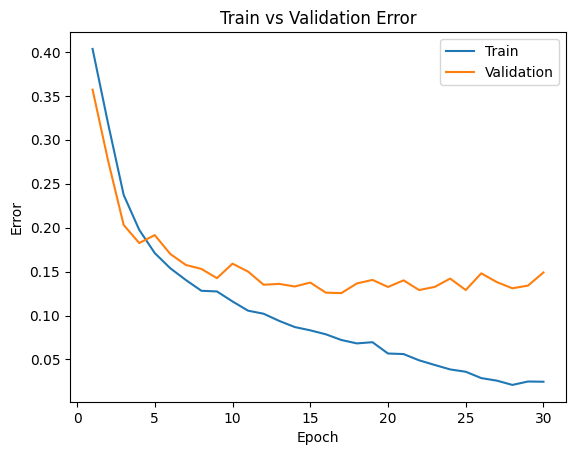

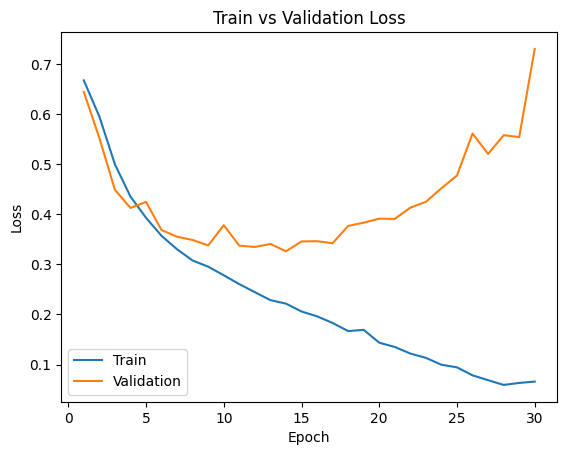

In [ ]:
# TO BE COMPLETED
large_net = LargeNet()
train_net(large_net, batch_size=25, learning_rate=0.005, num_epochs=30)
model_path8 = get_model_name("large", batch_size=25, learning_rate=0.005, epoch=29)
plot_training_curve(model_path8)



## Part 4. Evaluating the Best Model


### Part (i) [2pt MODEL]

Summarize in a table the results achieved on training and validation on all your model selections. This includes choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`,
**and the epoch number**. Hint: you can import the Pandas module to create tables.


Then upon reviewing the results choose your **best** model and load the model checkpoint. You can modify the code below to load your chosen set of weights to the model object `net`.

In [ ]:
net = large_net#small or large network
model_path = get_model_name('large', batch_size=32, learning_rate=0.001, epoch=29)
state1 = torch.load(model_path)
net.load_state_dict(state1)


<All keys matched successfully>

In [ ]:
# TO BE COMPLETED
import pandas as pd

#organize data (this was done manually by checking the csvs)
data = [['Small',0.01,64,30,0.15,0.36,0.181,0.416],
                ['Large',0.01,64,30,0.037,0.099,0.14,0.46],
                ['Large',0.001,64,30,0.19,0.44,0.20,0.45],
                ['Large',0.1,64,30,0.050,0.69,0.49,0.44],
                ['Large',0.01,512,30,0.17,0.40,0.19,0.42],
                ['Large',0.01,16,30,0.5,None,0.49, None],
                ['Large',0.001,32,30,0.14,0.31,0.16,0.55],
                ['Large',0.005,25,30,0.0025,0.066,0.14,0.73]]

Evaluation = pd.DataFrame(data,columns = ['Model','Learning Rate', 'Batch Size', 'Epoch Number','Training Error','Training Loss','Validation Error','Validation Loss'])



In [ ]:
Evaluation

,Model,Learning Rate,Batch Size,Epoch Number,Training Error,Training Loss,Validation Error,Validation Loss
0,Small,0.010,64,30,0.1500,0.360,0.181,0.416
1,Large,0.010,64,30,0.0370,0.099,0.140,0.460
2,Large,0.001,64,30,0.1900,0.440,0.200,0.450
3,Large,0.100,64,30,0.0500,0.690,0.490,0.440
4,Large,0.010,512,30,0.1700,0.400,0.190,0.420
5,Large,0.010,16,30,0.5000,NaN,0.490,NaN
6,Large,0.001,32,30,0.1400,0.310,0.160,0.550
7,Large,0.005,25,30,0.0025,0.066,0.140,0.730


### Part (ii) [4pt DISCUSSION]

Justify your choice of model from Part (i).

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The best network was a large net using a learning rate of 0.001 and batch size
of 32, with 30 epochs. This network was chosen based off low validation error
and the lack of overfitting. There were 2 networks which had the lowest validation error
rounded to 2 significatn figures, Model 7 and Model 1. Their final error
rounded to 14%. However, both of these models exhibited severe overfitting of
the data, with differences between training and validation error of roughly ~10%
and ~14% for models 1 and 7 respectively. This indicates that the training of
the network does not generalize well to real world data, and that even though
technically both of these models had lower validation error, I'd prefer to
choose the network whose training generalized better to the validation set.
In this case, the clear choice is model 6, with a validation error of 16%, only
2% higher than it's training error and 2% higher than the validation error of
models 1 and 7. This model clearly balances a low validation error while being
a better fit betweent he training and validation data.

'''

### Part (iii) [4pt RESULT]

Using the helper code in Part 0, any code from lecture notes, or any code that you write, compute and report the **test classification error** for your chosen model.

In [ ]:
# If you use the `evaluate` function provided in part 0, you will need to
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"],
    batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# TO BE COMPLETED

#Apply test data to the neural network
criterion = nn.BCEWithLogitsLoss()
"""
I'm choosing the just use the evaluate function with the test_loader. Even
though we don't care about loss I'm also printing it regardless.
"""
test_err, test_loss = evaluate(net, test_loader, criterion)
print("Test Error of {} with Test Loss of {}".format(test_err,test_loss))


Test Error of 0.142 with Test Loss of 0.3575996817089617


### Part (iv) [3pt DISCUSSION]

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

My network achieved a test error of 14.20%.

Normally, one would expect the test error to be higher than the validation error
simply because we have fine tuned (or at least moderately tuned) our
hyperparameters to give us the lowest validation error possible. On one hand
this is a method meant to generalize the network training to other datasets, but
it also creates some bias towards the validation set specifically. Since I've
tuned the learning rate and batch size to optimize the validation set
specifically, more often than not the test data will have a higher error since
it brings in new, unseen data with possibly new features.

With all that said, it's not guaranteed that the test data will always result
in a lower accuracy/higher error than the validation data. In this case, the
test error and validation error are very close (0.55% apart), which
might communicate a few things about the network and data.

  1.  Overall I think the chosen hyperparameters (given the selection tested)
      did a good job of generalizing the network to the test
  2.  The training/validation data was 'hard' to train on, or had more outliers
      and difficult cases to learn.
  3.  The test data was 'easier' to train on, or it had fewer outliers and
      simpler cases to learn.

This is purely speculation obviously, but the latter 2 points would explain a
lower test error than validation error.

'''

### Part (v) [3pt DISCUSSION]
Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

We use test data only at the very end to evaluate the model after we've
performed tuning. After the model architecture and hyperparameters have
been decided using training and adjusted to improve the validation set,
which acts as a proxy to real world, unseen data, only then do use the
test data. This is primarily to ensure an unbiased model assessment and data
leakage. If we use the test data during the training of the network to adjust
parameters, then we're inadvertently fitting our model to the test data,
which will give overly optimistic performance estimates. To ensure model
robustness and correctly evaluate performance without bias, the test data
should only be used at the very end of training and iterative tuning.


'''

## Part 5. Fully-Connected Linear ANN vs CNN [4pt RESULT]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.

How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying car and truck images?

In [ ]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

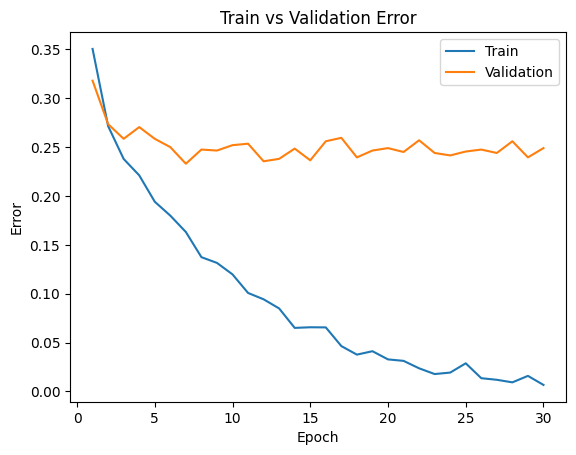

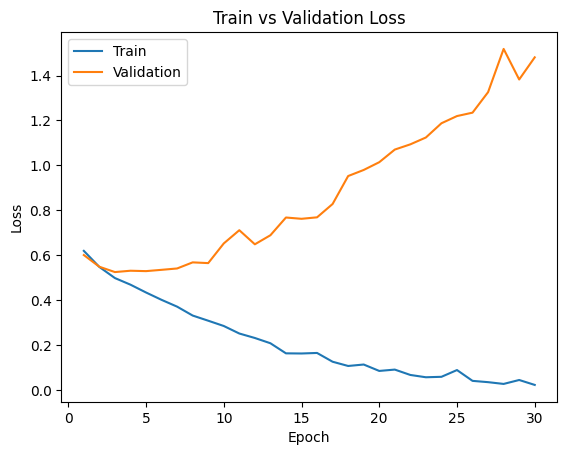

In [ ]:
# TO BE COMPLETED
#Trial 1
simple_ann = simpleANN()
train_net(simple_ann, batch_size=64, learning_rate=0.01, num_epochs=30)
model_path9 = get_model_name("simple", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path9)

#This severely overfit

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.337125, Train loss: 0.6058711240291595 |Validation err: 0.3, Validation loss: 0.5756568090310172
Epoch 2: Train err: 0.263, Train loss: 0.5350078791379929 |Validation err: 0.267, Validation loss: 0.5449511952816494
Epoch 3: Train err: 0.2325, Train loss: 0.4914902390241623 |Validation err: 0.248, Validation loss: 0.5231865095713782
Epoch 4: Train err: 0.213375, Train loss: 0.4550414588451385 |Validation err: 0.2515, Validation loss: 0.5139851139651405
Epoch 5: Train err: 0.193125, Train loss: 0.4206357706785202 |Validation err: 0.258, Validation loss: 0.5434102576876444
Epoch 6: Train err: 0.174375, Train loss: 0.3893045063018799 |Validation err: 0.249, Validation loss: 0.5454022808680459
Epoch 7: Train err: 0.15925, Train loss: 0.3590781434178352 |Validation err: 0.245, Validation loss: 0.5476918423932696
Epoch 8: Train err: 0.138625, Train loss: 0.3250295778512955 |Validation err: 0.249,

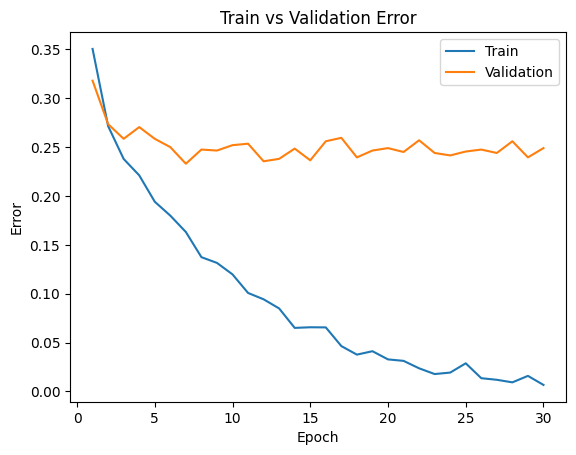

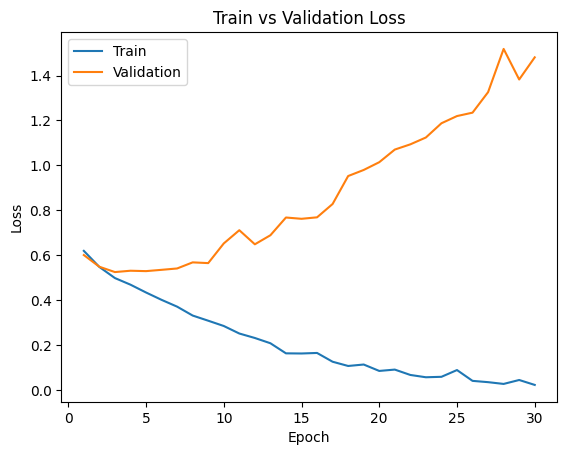

In [ ]:
#Trial 2
simple_ann = simpleANN()
train_net(simple_ann, batch_size=32, learning_rate=0.006, num_epochs=30)
model_path10 = get_model_name("simple", batch_size=32, learning_rate=0.006, epoch=29)
plot_training_curve(model_path10)

#still severly overfit

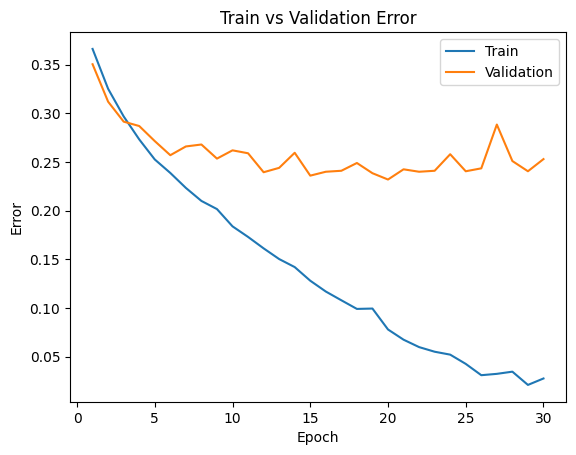

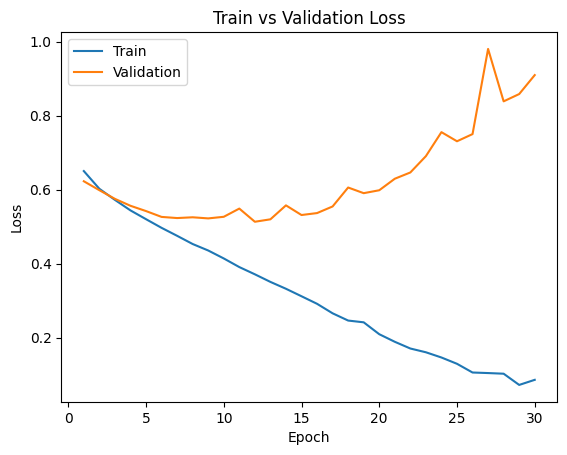

In [ ]:
simple_ann = simpleANN()
train_net(simple_ann, batch_size=25, learning_rate=0.001, num_epochs=30)
model_path11 = get_model_name("simple", batch_size=25, learning_rate=0.001, epoch=29)
plot_training_curve(model_path11)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.49625, Train loss: 0.6932183317840099 |Validation err: 0.4945, Validation loss: 0.6902166903018951
Epoch 2: Train err: 0.439625, Train loss: 0.6826649345457554 |Validation err: 0.415, Validation loss: 0.6806292235851288
Epoch 3: Train err: 0.3895, Train loss: 0.6733378171920776 |Validation err: 0.3895, Validation loss: 0.6733366250991821
Epoch 4: Train err: 0.37275, Train loss: 0.6656798422336578 |Validation err: 0.3805, Validation loss: 0.6671618521213531
Epoch 5: Train err: 0.36275, Train loss: 0.6585663259029388 |Validation err: 0.3735, Validation loss: 0.6603522300720215
Epoch 6: Train err: 0.3535, Train loss: 0.6510516963899136 |Validation err: 0.369, Validation loss: 0.6540818214416504
Epoch 7: Train err: 0.348875, Train loss: 0.6441584713757038 |Validation err: 0.3595, Validation loss: 0.6475006341934204
Epoch 8: Train err: 0.344625, Train loss: 0.6371752806007862 |Validation err: 0

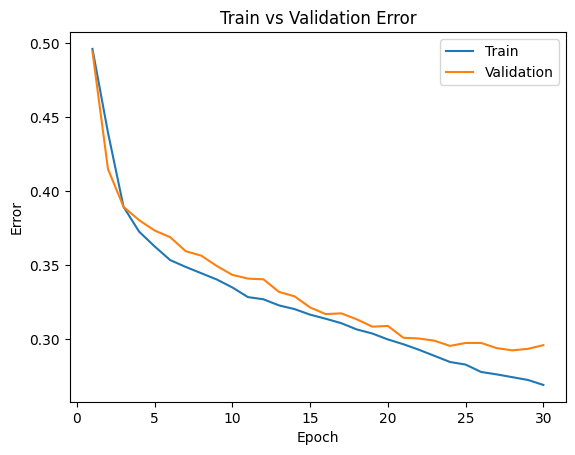

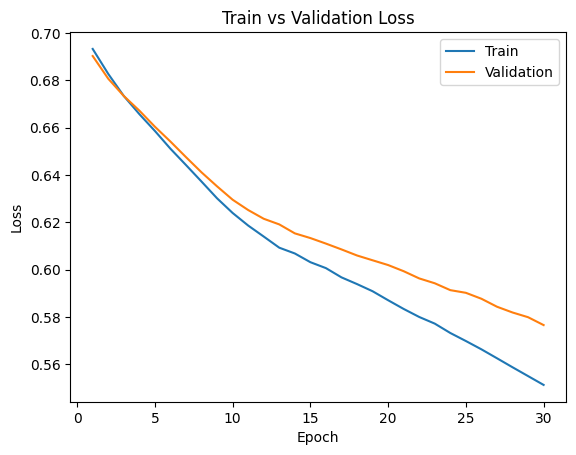

In [ ]:
simple_ann = simpleANN()
train_net(simple_ann, batch_size=512, learning_rate=0.002, num_epochs=30)
model_path12 = get_model_name("simple", batch_size=512, learning_rate=0.002, epoch=29)
plot_training_curve(model_path12)

100%|██████████| 170498071/170498071 [00:05<00:00, 30816424.60it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1: Train err: 0.444625, Train loss: 0.6868690922856331 |Validation err: 0.3645, Validation loss: 0.6774023920297623
Epoch 2: Train err: 0.356625, Train loss: 0.6679097041487694 |Validation err: 0.365, Validation loss: 0.6584098041057587
Epoch 3: Train err: 0.352375, Train loss: 0.647662241011858 |Validation err: 0.3595, Validation loss: 0.6401448398828506
Epoch 4: Train err: 0.35125, Train loss: 0.6319590844213963 |Validation err: 0.359, Validation loss: 0.6308517009019852
Epoch 5: Train err: 0.34625, Train loss: 0.6228637434542179 |Validation err: 0.3525, Validation loss: 0.6235667914152145
Epoch 6: Train err: 0.337875, Train loss: 0.613943301141262 |Validation err: 0.3455, Validation loss: 0.6181359142065048
Epoch 7: Train err: 0.331875, Train loss: 0.6062728464603424 |Validation err: 0.333, Validation loss: 0.6125096082687378
Epoch 8: Train err: 0.32225, Train loss: 0.5990280881524086 |Val

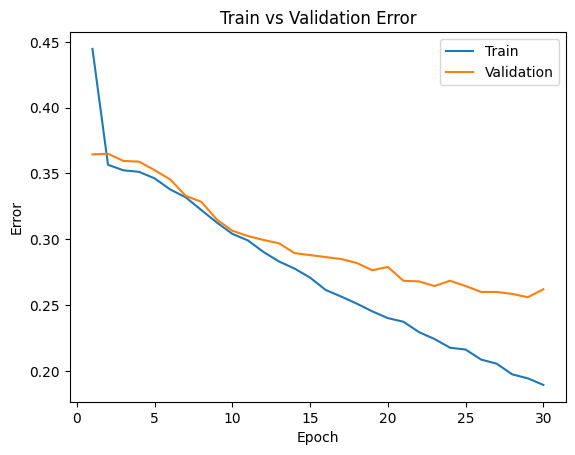

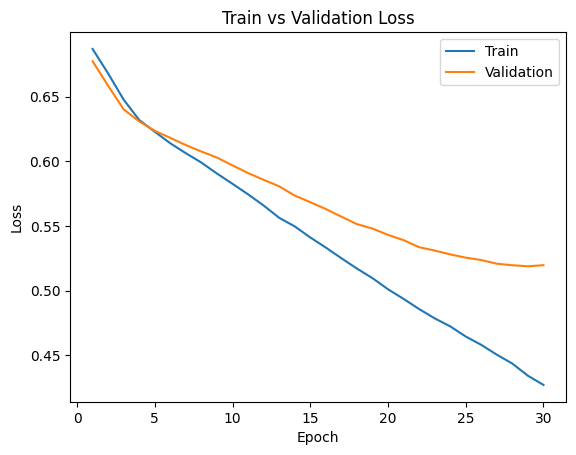

In [ ]:
simple_ann = simpleANN()
train_net(simple_ann, batch_size=512, learning_rate=0.005, num_epochs=30)
model_path13 = get_model_name("simple", batch_size=512, learning_rate=0.005, epoch=29)
plot_training_curve(model_path13)


In [ ]:
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"],
    batch_size=64)

net2 = simpleANN()#small or large network
#call model name
model_path20 = get_model_name('simple', batch_size=512, learning_rate=0.005, epoch=29)
#get state
state2 = torch.load(model_path20)
net2.load_state_dict(state2)

criterion = nn.BCEWithLogitsLoss()
test_err2, test_loss2 = evaluate(net2, test_loader, criterion)
print("Test Error of {} with Test Loss of {}".format(test_err2,test_loss2))

Files already downloaded and verified
Files already downloaded and verified
Test Error of 0.2555 with Test Loss of 0.5085366480052471


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The best model I trained with the ann implemented a large batch size of 512 and a
learning rate of 0.005. This, just like all the other models using an ann, still
lead to an overfit network with a training error around 18% and a validation
error around 25% - 26%. It tested to 25.5% accuracy. This result is better than several
of the previous results in terms of overfitting and variation between the
training and validation data but nearly all hyperparameter choices tested still
lead to a validation error of roughly 25%. The test data, again, has matched the
validation error extremely well.

Compared to the CNN model, this ANN does not do nearly as well. With a gap of
roughly 11% in error in both the validation data and, more importantly, the test
data, the 2-layer linear artificial neural network performs significantly worse.
This is to be expected since convolutional neural networks are especially
excellent at processing images and getting features.


'''

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to perform a deeper exploration of the assignment.

In part A we constructed and trained a 2-layer neural network from scratch. In Part B we saw how PyTorch can be used to simplify the construction of neural networks by taking care of all the complexity related to gradient calculations, training on GPUs, and structuring your code.

For this bonus challenge we will propose additional task that will have you work towards completing the pipeline and deploying the models online, while exploring ways to improve these models along the way.

Tasks:

1. Modify your code to classify images that are not cars or trucks into the category "other".
2. Preprocess images from the internet to be able to classify any images into cars and trucks (i.e., resize, aspect ratio, etc.). Evaluate your best model's performance on images loaded from the internet.
3. Deploy your best model onto huggingface spaces (or other web hosting services) to classify images into cars, trucks, and "other" if you've completed task 1.

Bonus marks will be provided based on the number of tasks completed and how well they are completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.

In [ ]:
# TO BE COMPLETED






In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html A1_PyTorch_Introduction.ipynb

[NbConvertApp] Converting notebook A1_PyTorch_Introduction.ipynb to html
[NbConvertApp] Writing 2238354 bytes to A1_PyTorch_Introduction.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **10 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**